## Understanding the problem


### What we're trying to do here is to classify whether a transaction is fraudulent or not. This will be done by using Decision Tree model in ML.

In [1]:
# Set-up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
fraud = pd.read_csv('Fraud_check.csv')

Understand the data: This step helps uncover issues that to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [3]:
# Look at some records
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
# Look at some details about the data
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud.shape

(600, 6)

In [7]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
fraud.describe(include=np.object)

C:\Users\esati\AppData\Local\Temp\ipykernel_16572\3272739857.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fraud.describe(include=np.object)


,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


In [9]:
# Check for missing values
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
fraud.duplicated().sum()

0

In [11]:
fraud.corr().style.background_gradient(cmap='coolwarm')

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [14]:
data=fraud.copy()
data['Income_cat'] = pd.cut(x = fraud['Taxable.Income'], bins = [0,30000,99620], labels = ['Risky', 'Good'])
data.head(20)
#data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income_cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


<AxesSubplot:xlabel='Income_cat', ylabel='count'>

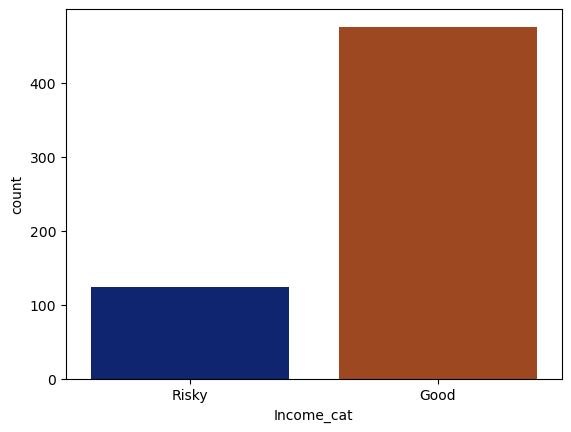

In [15]:
sns.countplot(data=data, x='Income_cat', palette = "dark")

In [16]:
data.drop('Taxable.Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban', 'Income_cat'], dtype='object')

In [19]:
data['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income_cat
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [20]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]
data.shape, X.shape, Y.shape

((600, 6), (600, 5), (600, 1))

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7, stratify=Y)

## Building Decision Tree Classifier using gini Criteria with random splitter

In [22]:
dt_clf_1 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='random')
dt_clf_1 = dt_clf_1.fit(X_train,Y_train)
Y_pred_1 = dt_clf_1.predict(X_test)
Y_pred_train_1 = dt_clf_1.predict(X_train)

In [23]:
print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_1))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_1))
print(confusion_matrix(Y_test, Y_pred_1))
print(classification_report(Y_test, Y_pred_1))

Accuracy_train: 0.8285714285714286
Accuracy_test: 0.7722222222222223
[[138   5]
 [ 36   1]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       143
           1       0.17      0.03      0.05        37

    accuracy                           0.77       180
   macro avg       0.48      0.50      0.46       180
weighted avg       0.66      0.77      0.70       180



## Building Decision Tree Classifier using Entropy Criteria

In [24]:
dt_clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='best')
dt_clf_2 = dt_clf_2.fit(X_train,Y_train)
Y_pred_2 = dt_clf_2.predict(X_test)
Y_pred_train_2 = dt_clf_2.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_2))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_2))
print(confusion_matrix(Y_test, Y_pred_2))
print(classification_report(Y_test, Y_pred_2))

Accuracy_train: 0.8285714285714286
Accuracy_test: 0.7722222222222223
[[138   5]
 [ 36   1]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       143
           1       0.17      0.03      0.05        37

    accuracy                           0.77       180
   macro avg       0.48      0.50      0.46       180
weighted avg       0.66      0.77      0.70       180



## Building Decision Tree Classifier using gini Criteria with best splitter

In [25]:
dt_clf_3 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='best')
dt_clf_3 = dt_clf_3.fit(X_train,Y_train)
Y_pred_3 = dt_clf_3.predict(X_test)
Y_pred_train_3 = dt_clf_3.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_3))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_3))
print(confusion_matrix(Y_test, Y_pred_3))
print(classification_report(Y_test, Y_pred_3))

Accuracy_train: 0.8357142857142857
Accuracy_test: 0.7666666666666667
[[137   6]
 [ 36   1]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       143
           1       0.14      0.03      0.05        37

    accuracy                           0.77       180
   macro avg       0.47      0.49      0.46       180
weighted avg       0.66      0.77      0.70       180



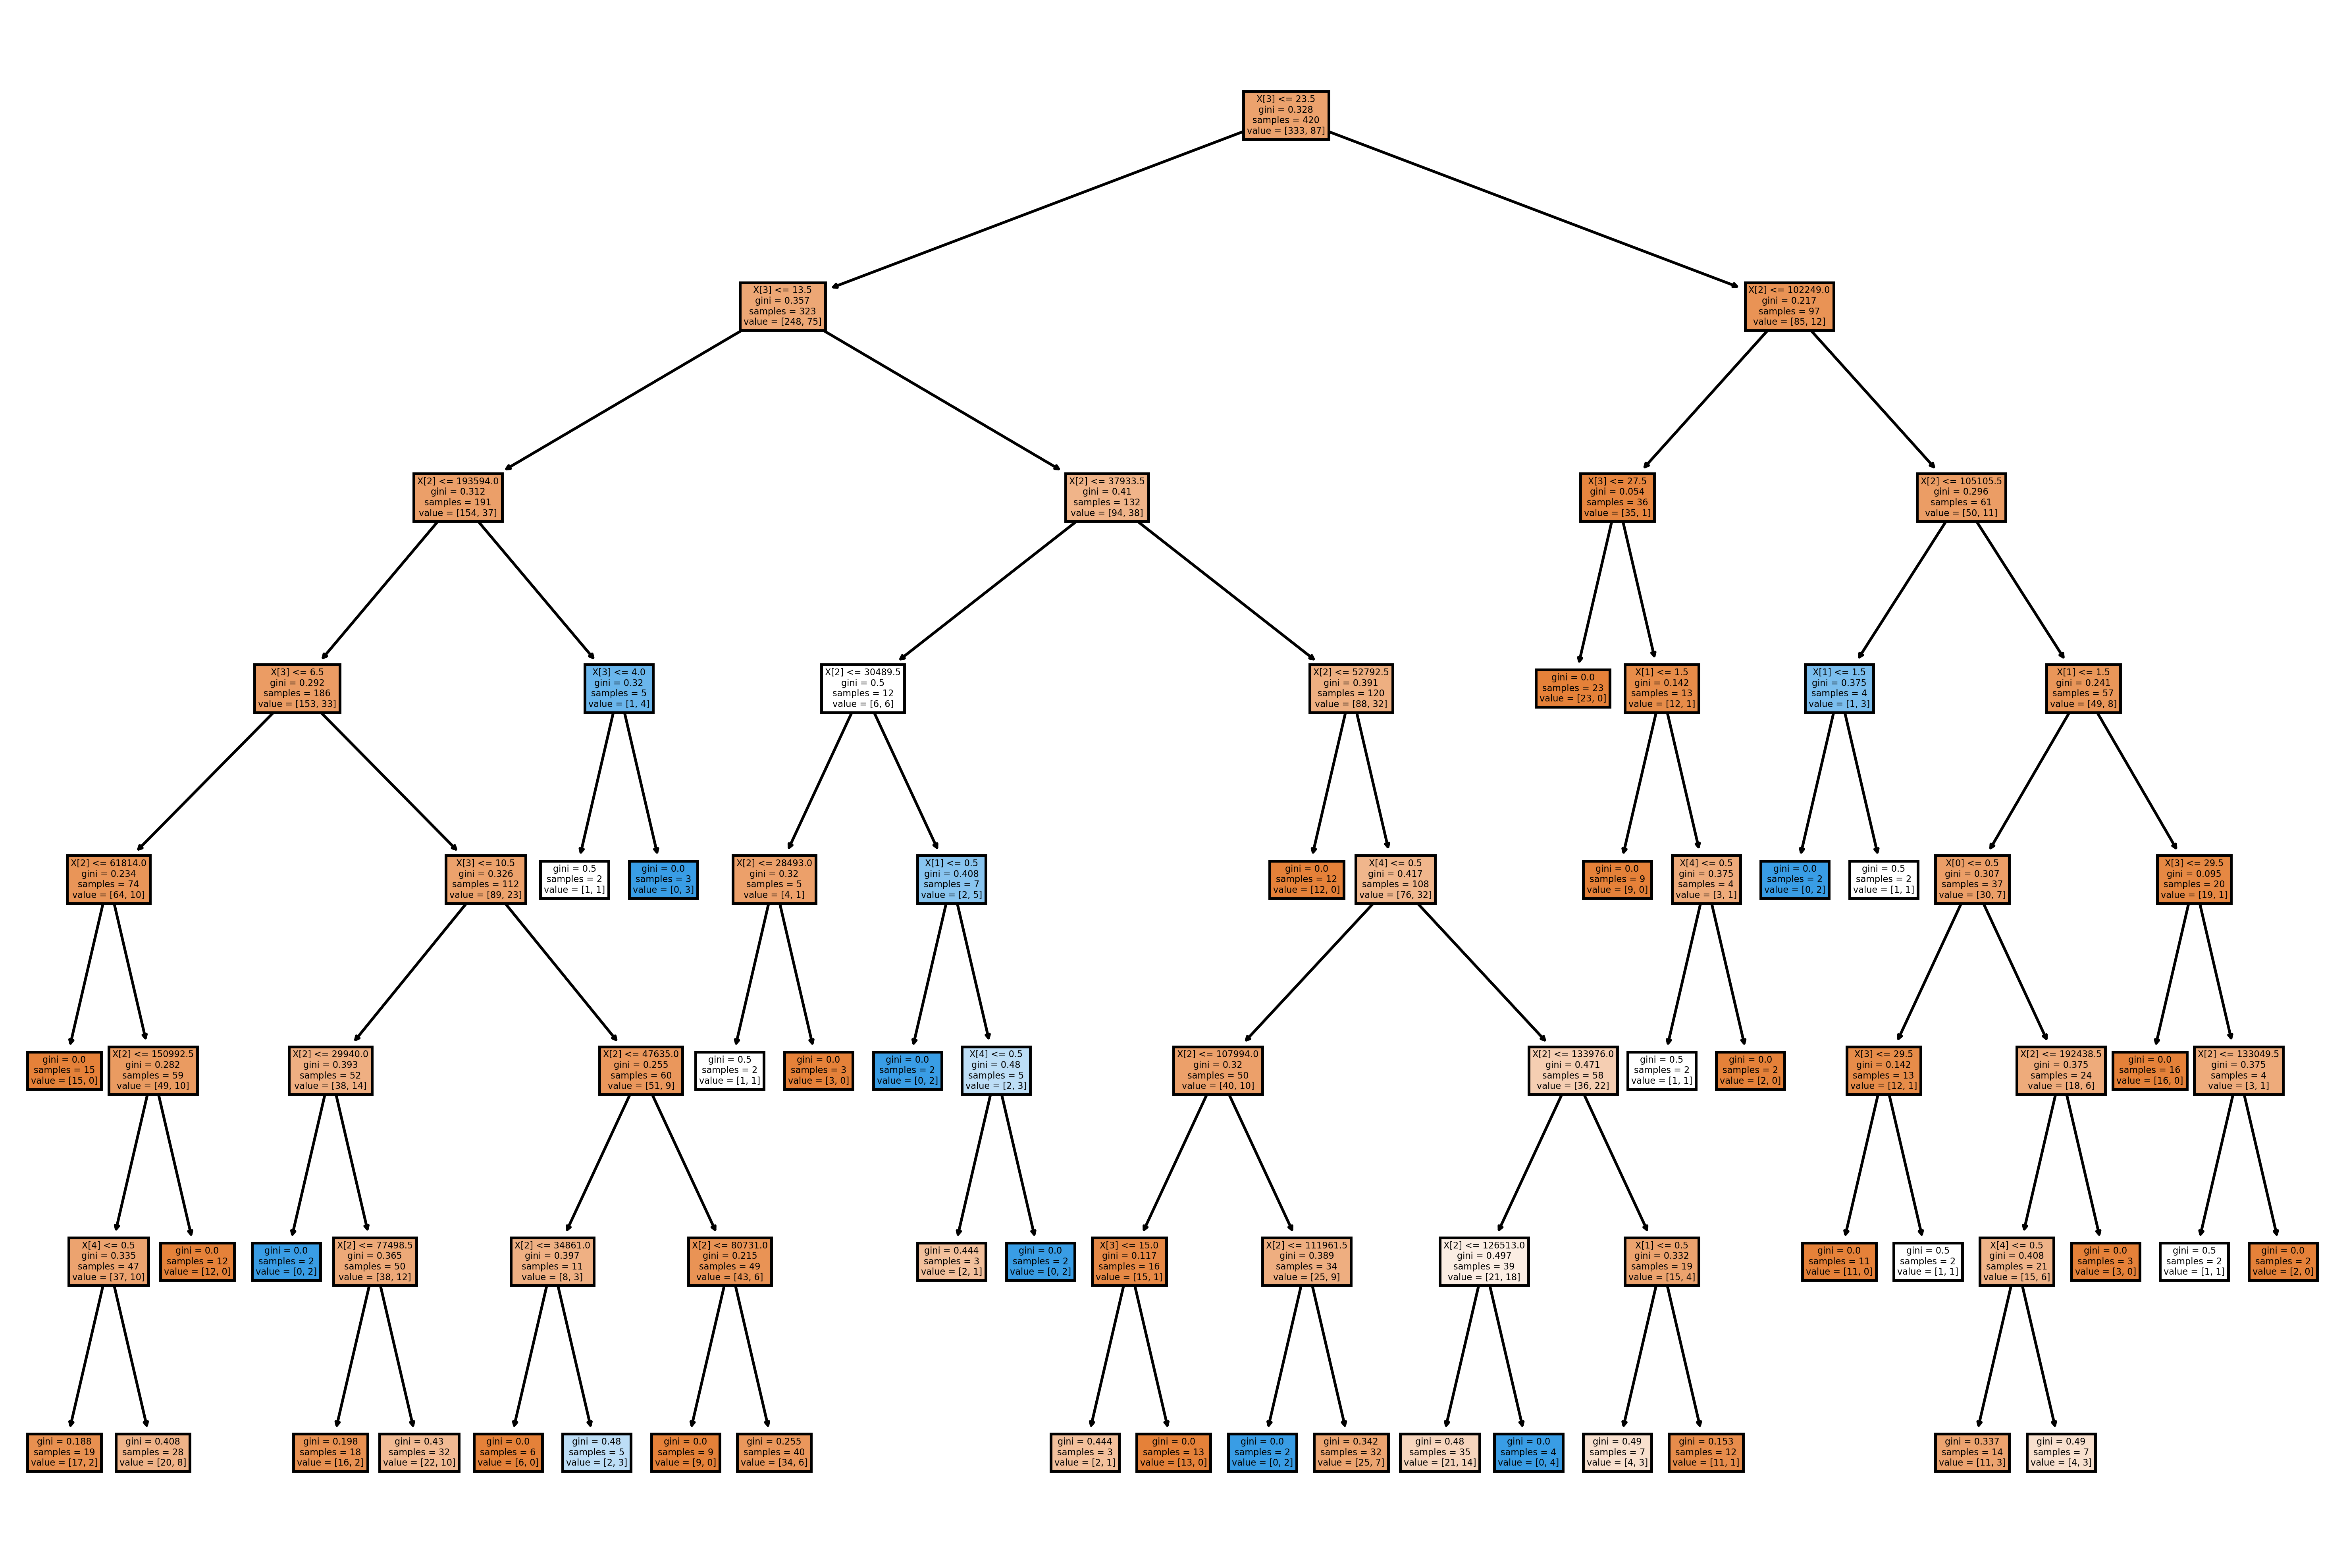

In [26]:
from sklearn import tree
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(dt_clf_3,filled=True)
plt.show()